# **Bike Rental - Assignment**

## 1. **Importing required libraries**



In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn


## 2. **Reading and Understanding the data**

In [367]:
#Read the data from CSV File
rental_bikes = pd.read_csv("day.csv");
rental_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [368]:
#get info of the data & data types.
rental_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1.   We dont have any null values in rows/columns
2.   All the data columns are either int or float except dteday



In [369]:
rental_bikes.shape 
#We have 730 rows and 16 columns

(730, 16)

In [370]:
rental_bikes["weathersit"].unique()
# checking the summary statistics of numerical columns
rental_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3. **Cleaning the Data**

In [371]:
# As per data dictionary the target variable count is a sum of two independent variables 'casual' and 'registered'. Validating the relationship.

rental_bikes['total_count'] = rental_bikes['casual'] + rental_bikes['registered']
rental_bikes.drop(['casual','registered', 'total_count'],axis=1,inplace=True)
rental_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [372]:
# Dropping column 'instant' as all values are unique.
# And dropping 'dteday' as we already have the columns 'yr' and 'momnthnth' for the same date. 

rental_bikes.drop(['instant','dteday'],axis=1,inplace=True)
rental_bikes.shape

(730, 12)

# 4. **Data Visualization**

> a. Visualizing Numeric Variables

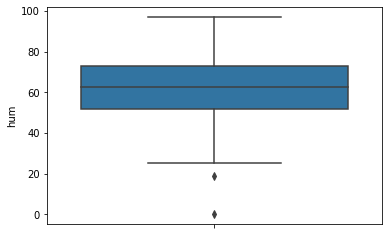

In [373]:
sns.boxplot(data=rental_bikes,y='hum')

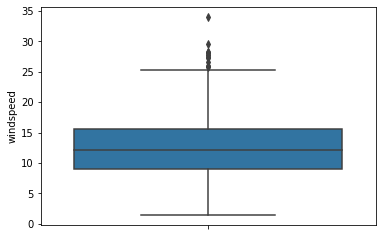

In [374]:
sns.boxplot(data=rental_bikes, y='windspeed')

In [375]:
# from above charts we can conclude that Humidity and Windspeed has outliers, hence cleaning up the same
rental_bikes = rental_bikes.drop(index = rental_bikes[(rental_bikes['hum'] < 20)].index)

rental_bikes = rental_bikes.drop(index = rental_bikes[(rental_bikes['windspeed'] > 25)].index)

In [376]:
rental_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      712 non-null    int64  
 1   yr          712 non-null    int64  
 2   mnth        712 non-null    int64  
 3   holiday     712 non-null    int64  
 4   weekday     712 non-null    int64  
 5   workingday  712 non-null    int64  
 6   weathersit  712 non-null    int64  
 7   temp        712 non-null    float64
 8   atemp       712 non-null    float64
 9   hum         712 non-null    float64
 10  windspeed   712 non-null    float64
 11  cnt         712 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 72.3 KB


In [377]:
#encoding weathersit based on data dictionary
#     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

rental_bikes["weathersit"].replace({1:"Clear/Partly Cloudy",2:"Misty",3:"Light Rain/Thunderstorm",4:"Heavy Rain/Thunderstorm/Snow"},inplace=True)

#Mapping the valriables
rental_bikes['season']=rental_bikes['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
rental_bikes['mnth']=rental_bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
rental_bikes['weekday']=rental_bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [378]:
rental_bikes.nunique().sort_values()
rental_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thu,1,Clear/Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Fri,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Sat,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sun,0,Clear/Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,6.184153,7.54440,48.2917,14.958889,1321


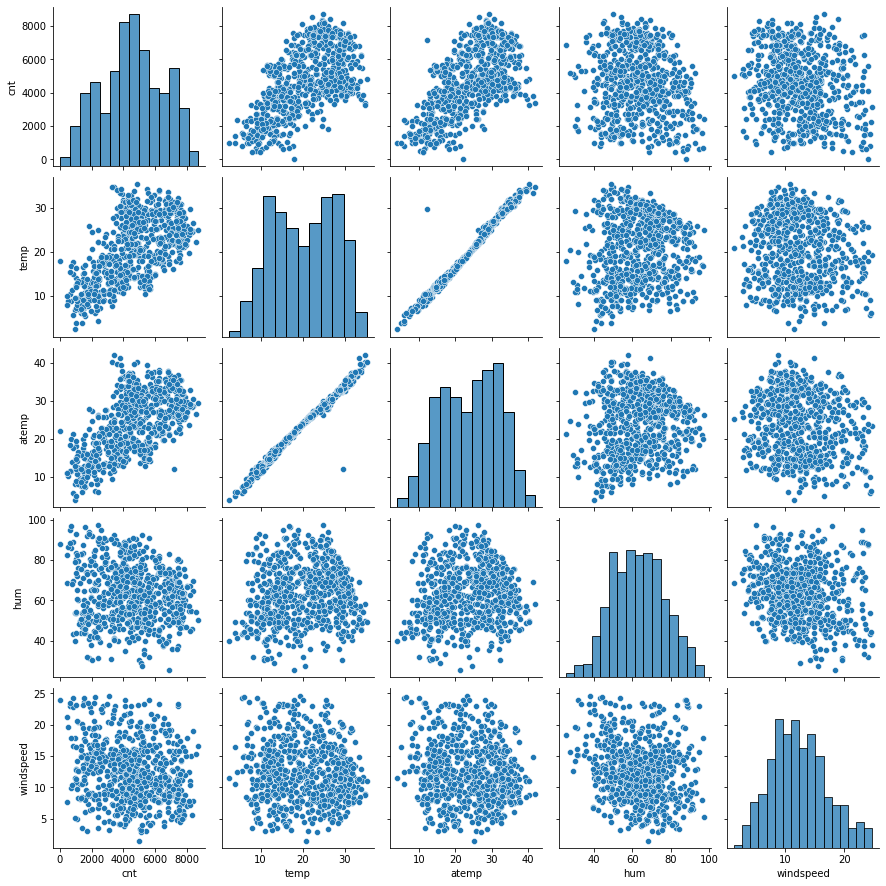

In [379]:
sns.pairplot(rental_bikes,vars=["cnt","temp","atemp","hum","windspeed"])
plt.show()

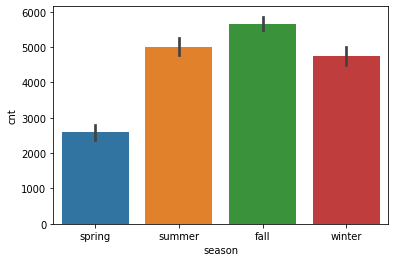

In [380]:
sns.barplot(data=rental_bikes, x='season' ,y='cnt')

rent is high in fall season

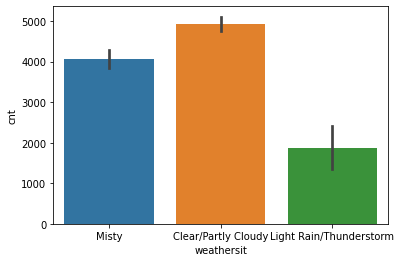

In [381]:
sns.barplot(data=rental_bikes,x='weathersit',y='cnt')


Rent is less when weather is Rain/Thunderstorm

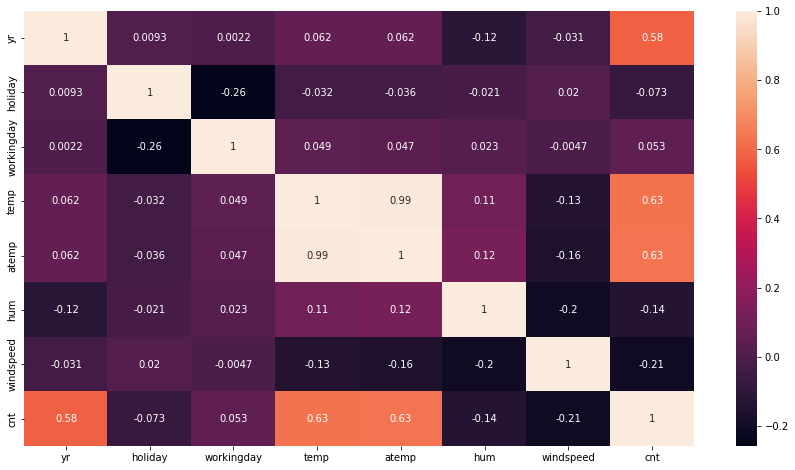

In [382]:
# Lets plot a correlation heat map for the continuous variables

plt.figure(figsize=(15,8))
sns.heatmap(data=rental_bikes.corr(), annot=True)
plt.show()

In [383]:
#According to the above heatmap the correlation between atemp and temp is 0.99, hence we can drop any one of these two columns

#Drop atemp column
rental_bikes.drop(columns={"atemp"},axis=1,inplace=True)
rental_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


> b. Visualizing Categorical Variables

From the above table we can conclude season, yr, mnth, holiday, weekday workingday, weathersit are the categorical variables. Lets plot graph using these variable against target column "cnt"

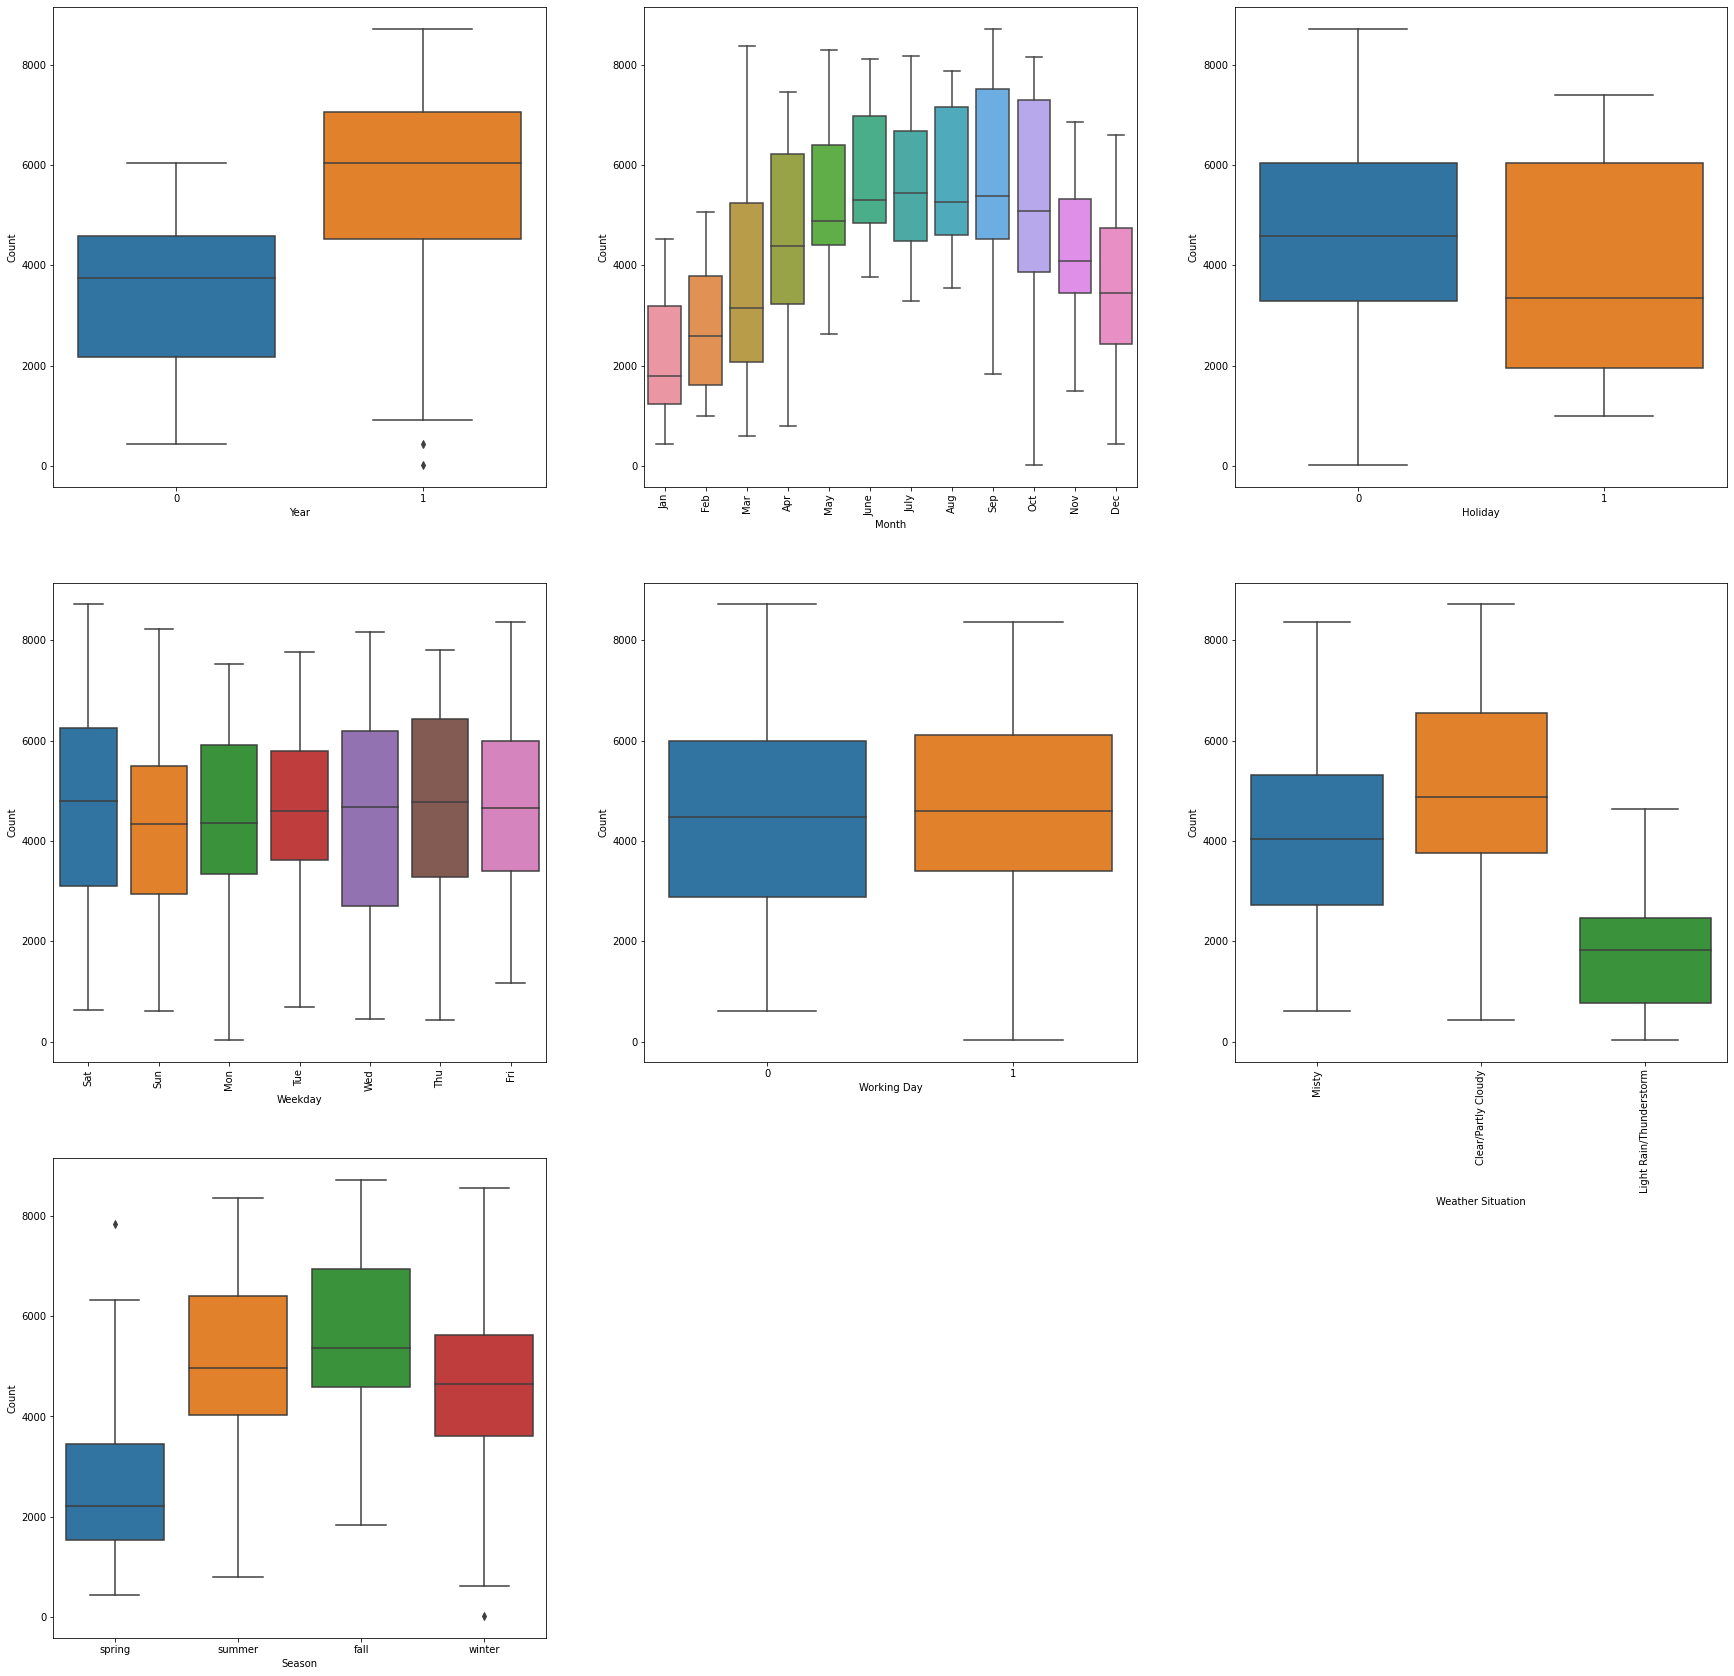

In [384]:
plt.figure(figsize=(30,30))

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental_bikes)
plt.xlabel("Holiday")
plt.ylabel("Count")

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental_bikes)
plt.xticks(rotation=90)
plt.xlabel("Weekday")
plt.ylabel("Count")

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental_bikes)
plt.xlabel("Working Day")
plt.ylabel("Count")

plt.subplot(3,3,1)
sns.boxplot(data=rental_bikes,x="yr",y="cnt")
plt.xlabel("Year")
plt.ylabel("Count")

plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental_bikes)
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Count")

plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental_bikes)
plt.xlabel("Weather Situation")
plt.xticks(rotation=90)
plt.ylabel("Count")


plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = rental_bikes)
plt.xlabel("Season")
plt.ylabel("Count")

plt.show()

OBSERVATION:

*   Demand of rental bikes is more during FALL as the weather conditions are favourable during these seasons.
*   Over non-Holidays, demand is more. This may be because people might be spending more family time at home or preferring car rentals for family commutation.
*   We dont see any bike rental during a 'Heavy Rain/Thunderstorm/Snow'day
*   There is no difference in rental bikes during weekday or workingday.




# **5. Data Modelling**

## Encoding

*   a. Convert Binary Categorical Variables to 1 and 0

*   b. Dummy Variable creation

a. Convert Binary Categorical Variables to 1 and 0

In [385]:
rental_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


Holiday & workingday are already encoded with 0 & 1.

b. Dummy Variable creation

In [386]:
list_categorical = ['season','mnth','weekday','weathersit']
rental_bikes = pd.get_dummies(data=rental_bikes,columns = list_categorical, drop_first=True)
rental_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Thunderstorm,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [387]:
#Dividing data into 70:30 Train:test sets
from sklearn.model_selection import train_test_split


rental_bikes_train, rental_bikes_test = train_test_split(rental_bikes, train_size =0.7,random_state=100)
print(rental_bikes_train.shape)
print(rental_bikes_test.shape)

(498, 29)
(214, 29)


In [388]:
#Scaling

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

#Create a list of numerical variables
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
rental_bikes_train[num_vars] = scaler.fit_transform(rental_bikes_train[num_vars])

rental_bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Thunderstorm,weathersit_Misty
423,1,0,1,0.373860,0.140157,0.494614,0.499425,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.271097,0.949641,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.230569,0.178102,0.951680,0,1,0,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.698871,0.797978,0.838141,0.442936,0,1,0,...,0,0,0,0,0,0,0,1,0,1
581,1,0,0,0.884740,0.524249,0.775155,0.626093,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Modelling - Building a Linear Model

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



X_train = rental_bikes_train
y_train = rental_bikes_train.pop('cnt')



Trial - 1

In [390]:
#add rfe columns as constants
X_train_sm = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#Fit
lr_model = lr.fit()

#params
lr_model.params

print(lr_model.params)

print(lr_model.summary())


const                                 0.238451
yr                                    0.227726
holiday                               0.032160
workingday                            0.086662
temp                                  0.400539
hum                                  -0.120436
windspeed                            -0.106826
season_spring                        -0.066254
season_summer                         0.021893
season_winter                         0.098666
mnth_Aug                              0.034510
mnth_Dec                             -0.059689
mnth_Feb                             -0.039633
mnth_Jan                             -0.063818
mnth_July                            -0.007628
mnth_June                             0.017289
mnth_Mar                              0.001220
mnth_May                              0.043075
mnth_Nov                             -0.046874
mnth_Oct                              0.019336
mnth_Sep                              0.078043
weekday_Mon  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Considering the P value we can exclude holiday & mnth_Jan as its high. But VIF has to be verified before dropping.

In [391]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def VIF_Calculator(X_train_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF_Calculator(X_train)

,Features,VIF
2,workingday,81.66
22,weekday_Sun,17.26
21,weekday_Sat,14.54
6,season_spring,10.92
8,season_winter,10.04
7,season_summer,8.03
17,mnth_Nov,7.54
3,temp,7.13
18,mnth_Oct,6.51
13,mnth_July,6.45


season_summer has high P value & VIF, hence dropping it.

Trial - 2


In [392]:
# Dropping highly correlated variable 'season_summer'
X_train_sm = X_train_sm.drop(['season_summer'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.77e-188
Time:                        17:48:20   Log-Likelihood:                 542.08
No. Observations:                 498   AIC:                            -1030.
Df Residuals:                     471   BIC:                            -916.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
21,weekday_Sat,inf
22,weekday_Sun,inf
8,season_winter,8.46
4,temp,6.97
7,season_spring,6.74
17,mnth_Nov,6.22
12,mnth_Jan,5.76
18,mnth_Oct,5.49


mnth_Nov has High P Value & VIF hence droppping it.

Trail-3

In [393]:
# Dropping highly correlated variable 'mnth_Nov'
X_train_sm = X_train_sm.drop(['mnth_Nov'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     122.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.38e-188
Time:                        17:48:20   Log-Likelihood:                 540.24
No. Observations:                 498   AIC:                            -1028.
Df Residuals:                     472   BIC:                            -919.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,holiday,inf
3,workingday,inf
20,weekday_Sat,inf
21,weekday_Sun,inf
4,temp,6.82
7,season_spring,5.49
12,mnth_Jan,3.87
13,mnth_July,3.51
8,season_winter,3.28
9,mnth_Aug,3.21


weekday_Wed has high P value hence dropping it.

In [394]:
# Dropping highly correlated variable 'weekday_Wed'
X_train_sm = X_train_sm.drop(['weekday_Wed'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.09e-189
Time:                        17:48:20   Log-Likelihood:                 540.24
No. Observations:                 498   AIC:                            -1030.
Df Residuals:                     473   BIC:                            -925.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,holiday,inf
3,workingday,inf
20,weekday_Sat,inf
21,weekday_Sun,inf
4,temp,6.81
7,season_spring,5.48
12,mnth_Jan,3.86
13,mnth_July,3.51
8,season_winter,3.28
9,mnth_Aug,3.21


weekday_Thu has high P value hence dropping it

In [395]:
# Dropping highly correlated variable 'weekday_Thu'
X_train_sm = X_train_sm.drop(['weekday_Thu'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.04e-190
Time:                        17:48:20   Log-Likelihood:                 540.10
No. Observations:                 498   AIC:                            -1032.
Df Residuals:                     474   BIC:                            -931.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
20,weekday_Sat,inf
2,holiday,inf
3,workingday,inf
21,weekday_Sun,inf
4,temp,6.79
7,season_spring,5.48
12,mnth_Jan,3.86
13,mnth_July,3.50
8,season_winter,3.28
9,mnth_Aug,3.20


mnth_Feb	 has high P value hence dropping it

In [396]:
# Dropping highly correlated variable 'mnth_Feb'
X_train_sm = X_train_sm.drop(['mnth_Feb'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     139.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.96e-191
Time:                        17:48:20   Log-Likelihood:                 539.95
No. Observations:                 498   AIC:                            -1034.
Df Residuals:                     475   BIC:                            -937.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,holiday,inf
3,workingday,inf
20,weekday_Sun,inf
19,weekday_Sat,inf
4,temp,6.61
12,mnth_July,3.49
8,season_winter,3.26
7,season_spring,3.23
9,mnth_Aug,3.18
13,mnth_June,2.67


mnth_July has high P Value

In [397]:
# Dropping highly correlated variable 'mnth_July'
X_train_sm = X_train_sm.drop(['mnth_July'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.06e-192
Time:                        17:48:21   Log-Likelihood:                 539.69
No. Observations:                 498   AIC:                            -1035.
Df Residuals:                     476   BIC:                            -942.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
18,weekday_Sat,inf
2,holiday,inf
3,workingday,inf
19,weekday_Sun,inf
4,temp,3.45
7,season_spring,3.19
8,season_winter,3.08
5,hum,2.11
11,mnth_Jan,1.82
22,weathersit_Misty,1.70


mnth_Dec has high P Value

In [398]:
# Dropping highly correlated variable 'mnth_Dec'
X_train_sm = X_train_sm.drop(['mnth_Dec'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.10e-193
Time:                        17:48:21   Log-Likelihood:                 538.72
No. Observations:                 498   AIC:                            -1035.
Df Residuals:                     477   BIC:                            -947.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,holiday,inf
3,workingday,inf
18,weekday_Sun,inf
17,weekday_Sat,inf
4,temp,3.39
7,season_spring,3.13
8,season_winter,2.91
5,hum,2.10
21,weathersit_Misty,1.70
10,mnth_Jan,1.70


mnth_Jan has high P value & VIF

In [399]:
# Dropping highly correlated variable 'mnth_Jan'
X_train_sm = X_train_sm.drop(['mnth_Jan'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.39e-194
Time:                        17:48:21   Log-Likelihood:                 537.84
No. Observations:                 498   AIC:                            -1036.
Df Residuals:                     478   BIC:                            -951.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,holiday,inf
3,workingday,inf
17,weekday_Sun,inf
16,weekday_Sat,inf
4,temp,3.23
7,season_spring,2.88
8,season_winter,2.83
5,hum,2.10
20,weathersit_Misty,1.69
9,mnth_Aug,1.53


holiday has high P Value.

In [400]:
# Dropping highly correlated variable 'holiday'
X_train_sm = X_train_sm.drop(['holiday'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.39e-194
Time:                        17:48:21   Log-Likelihood:                 537.84
No. Observations:                 498   AIC:                            -1036.
Df Residuals:                     478   BIC:                            -951.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
0,const,84.03
2,workingday,8.15
16,weekday_Sun,5.77
15,weekday_Sat,5.25
3,temp,3.23
6,season_spring,2.88
7,season_winter,2.83
4,hum,2.10
19,weathersit_Misty,1.69
8,mnth_Aug,1.53


weekday_Sun has high P Value

In [401]:
# Dropping highly correlated variable 'weekday_Sun'
X_train_sm = X_train_sm.drop(['weekday_Sun'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.59e-195
Time:                        17:48:21   Log-Likelihood:                 537.84
No. Observations:                 498   AIC:                            -1038.
Df Residuals:                     479   BIC:                            -957.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,49.77
3,temp,3.23
6,season_spring,2.88
7,season_winter,2.83
4,hum,2.10
18,weathersit_Misty,1.69
2,workingday,1.63
15,weekday_Sat,1.54
8,mnth_Aug,1.53
12,mnth_Oct,1.47


weekday_Tue has high P Value

In [402]:
# Dropping highly correlated variable 'weekday_Tue'
X_train_sm = X_train_sm.drop(['weekday_Tue'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.60e-195
Time:                        17:48:21   Log-Likelihood:                 536.42
No. Observations:                 498   AIC:                            -1037.
Df Residuals:                     480   BIC:                            -961.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,49.51
3,temp,3.22
6,season_spring,2.88
7,season_winter,2.82
4,hum,2.09
17,weathersit_Misty,1.69
2,workingday,1.54
15,weekday_Sat,1.54
8,mnth_Aug,1.52
12,mnth_Oct,1.47


weekday_Mon has high P Value & VIF

In [403]:
# Dropping highly correlated variable 'weekday_Mon'
X_train_sm = X_train_sm.drop(['weekday_Mon'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.63e-196
Time:                        17:48:21   Log-Likelihood:                 534.75
No. Observations:                 498   AIC:                            -1036.
Df Residuals:                     481   BIC:                            -963.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,49.30
3,temp,3.21
6,season_spring,2.88
7,season_winter,2.82
4,hum,2.09
16,weathersit_Misty,1.69
2,workingday,1.54
14,weekday_Sat,1.53
8,mnth_Aug,1.52
12,mnth_Oct,1.47


mnth_June has high P Value & VIF

In [404]:
# Dropping highly correlated variable 'mnth_June'
X_train_sm = X_train_sm.drop(['mnth_June'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr= sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.31e-196
Time:                        17:48:21   Log-Likelihood:                 532.90
No. Observations:                 498   AIC:                            -1034.
Df Residuals:                     482   BIC:                            -966.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
0,const,49.30
3,temp,3.01
6,season_spring,2.84
7,season_winter,2.75
4,hum,2.07
15,weathersit_Misty,1.68
2,workingday,1.53
13,weekday_Sat,1.52
11,mnth_Oct,1.46
14,weathersit_Light Rain/Thunderstorm,1.46


mnth_Aug has high P Value

In [405]:
# Dropping highly correlated variable 'mnth_Aug'
X_train_sm = X_train_sm.drop(['mnth_Aug'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr= sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.64e-197
Time:                        17:48:21   Log-Likelihood:                 531.56
No. Observations:                 498   AIC:                            -1033.
Df Residuals:                     483   BIC:                            -970.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,49.29
3,temp,2.88
6,season_spring,2.82
7,season_winter,2.70
4,hum,2.07
14,weathersit_Misty,1.68
2,workingday,1.53
12,weekday_Sat,1.52
13,weathersit_Light Rain/Thunderstorm,1.46
10,mnth_Oct,1.45


hum has high P value & VIF

In [406]:
# Dropping highly correlated variable 'hum'
X_train_sm = X_train_sm.drop(['hum'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr= sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.35e-193
Time:                        17:48:21   Log-Likelihood:                 520.69
No. Observations:                 498   AIC:                            -1013.
Df Residuals:                     484   BIC:                            -954.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,43.03
5,season_spring,2.80
3,temp,2.75
6,season_winter,2.64
2,workingday,1.51
11,weekday_Sat,1.51
9,mnth_Oct,1.45
8,mnth_May,1.16
7,mnth_Mar,1.12
4,windspeed,1.10


temp has high P Value & VIF

In [407]:
# Dropping highly correlated variable 'temp'
X_train_sm = X_train_sm.drop(['temp'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr= sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.52e-158
Time:                        17:48:22   Log-Likelihood:                 433.49
No. Observations:                 498   AIC:                            -841.0
Df Residuals:                     485   BIC:                            -786.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
0,const,14.71
5,season_winter,1.63
2,workingday,1.51
10,weekday_Sat,1.51
8,mnth_Oct,1.38
4,season_spring,1.32
7,mnth_May,1.16
6,mnth_Mar,1.11
3,windspeed,1.09
9,mnth_Sep,1.09


mnth_Mar has high P Value

In [408]:
# Dropping highly correlated variable 'mnth_Mar'
X_train_sm = X_train_sm.drop(['mnth_Mar'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr= sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.05e-159
Time:                        17:48:22   Log-Likelihood:                 433.30
No. Observations:                 498   AIC:                            -842.6
Df Residuals:                     486   BIC:                            -792.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
0,const,14.70
5,season_winter,1.62
2,workingday,1.51
9,weekday_Sat,1.51
7,mnth_Oct,1.38
4,season_spring,1.29
6,mnth_May,1.15
8,mnth_Sep,1.09
3,windspeed,1.08
10,weathersit_Light Rain/Thunderstorm,1.07


mnth_May has high P Value

In [409]:
# Dropping highly correlated variable 'mnth_May'
X_train_sm = X_train_sm.drop(['mnth_May'],axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_sm)

# building second fitted model
lr= sm.OLS(y_train, X_train_lm).fit()

# summary statistics of model obtained
print(lr.summary())

VIF_Calculator(X_train_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.12e-160
Time:                        17:48:22   Log-Likelihood:                 432.53
No. Observations:                 498   AIC:                            -843.1
Df Residuals:                     487   BIC:                            -796.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
0,const,13.98
5,season_winter,1.52
2,workingday,1.51
8,weekday_Sat,1.51
6,mnth_Oct,1.38
4,season_spring,1.18
3,windspeed,1.08
9,weathersit_Light Rain/Thunderstorm,1.07
7,mnth_Sep,1.06
10,weathersit_Misty,1.04


In [411]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.12e-160
Time:                        17:49:29   Log-Likelihood:                 432.53
No. Observations:                 498   AIC:                            -843.1
Df Residuals:                     487   BIC:                            -796.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5128      0.017     29.818      0.000       0.479       0.547
yr                                     0.2456      0.009     26.570      0.000       0.227       0.264
workingday                             0.0630      0.012      5.120      0.000       0.039       0.087
windspeed                             -0.1116      0.023     -4.875      0.000      -0.157      -0.067
season_spring                         -0.2866      0.012    -24.427      0.000      -0.310      -0.264
season_winter                         -0.0966      0.013     -7.376      0.000      -0.122      -0.071
mnth_Oct                               0.1130      0.020      5.753      0.000       0.074       0.152
mnth_Sep                               0.0812      0.018      4.609      0.000       0.047       0.116
weekday_Sat                            0.0670      0.017      3.938      0.000       0.034       0.100
weathersit_Light Rain/Thunderstorm    -0.3205      0.029    -11.125      0.000      -0.377      -0.264
weathersit_Misty                      -0.0806      0.010     -8.295      0.000      -0.100      -0.061
==============================================================================
Omnibus:                       82.512   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.026
Skew:                          -0.832   Prob(JB):                     2.47e-46
Kurtosis:                       5.711   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 There are no Features with VIF>5

After analysing all the columns , the final model is a good fit with R^2 value of 79, and p-Values < 0.05 and VIF < 5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


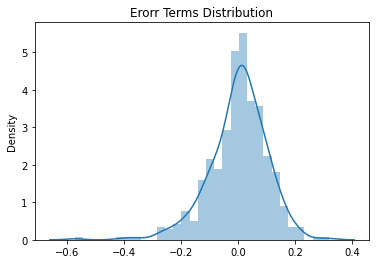

In [414]:
y_train_pred = lr.predict(X_train_sm)
res = y_train-y_train_pred
sns.distplot(res)
plt.title("Erorr Terms Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


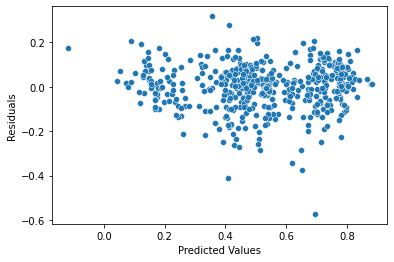

In [415]:
#Error Terms and y_train set scatter plot
sns.scatterplot(y_train_pred,res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

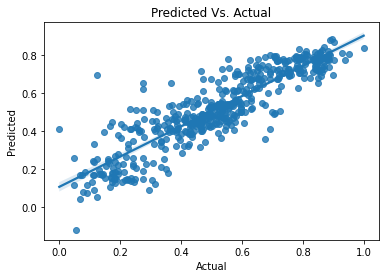

In [416]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# **Predictions and Evaluations on Test Data Set**

*   Rescale test DS
*   Fit train ds
*   Transform test ds





In [418]:
#Create a a list of num variables
# from sklearn.preprocessing import MinMaxScaler


# scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
# Fit on data - test data set should only be transformed and fit should be done only on training data set
rental_bikes_test[num_vars] = scaler.transform(rental_bikes_test[num_vars])
rental_bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Thunderstorm,weathersit_Misty
585,1,0,1,0.868126,0.476238,0.386691,0.835711,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1,0,1,0.340632,0.483721,0.467646,0.603428,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,0,0,0,0.452776,0.489332,0.203239,0.493097,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,0,0,1,0.807900,0.442568,0.478392,0.553497,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1,0,1,0.607495,0.473120,0.276987,0.885642,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [419]:
X_test = rental_bikes_test
y_test = rental_bikes_test.pop('cnt')
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Thunderstorm,weathersit_Misty
585,1.0,1,0,1,0.868126,0.476238,0.386691,0,0,0,...,0,0,0,0,0,1,0,0,0,0
717,1.0,1,0,1,0.340632,0.483721,0.467646,0,0,1,...,0,0,0,0,0,0,0,1,0,0
294,1.0,0,0,0,0.452776,0.489332,0.203239,0,0,1,...,1,0,0,1,0,0,0,0,0,0
157,1.0,0,0,1,0.807900,0.442568,0.478392,0,1,0,...,0,0,0,0,0,0,1,0,0,0
627,1.0,1,0,1,0.607495,0.473120,0.276987,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [423]:
#Dropping columns that were dropped in train set
X_test_sm = X_test_sm.drop(['season_summer','mnth_Nov','weekday_Wed','weekday_Thu','mnth_Feb','mnth_July','mnth_Dec','mnth_Jan','holiday','weekday_Sun','weekday_Tue','weekday_Mon','mnth_June','mnth_Aug','hum','temp','mnth_Mar','mnth_May'],axis=1)
X_test_sm.head()

,const,yr,workingday,windspeed,season_spring,season_winter,mnth_Oct,mnth_Sep,weekday_Sat,weathersit_Light Rain/Thunderstorm,weathersit_Misty
585,1.0,1,1,0.386691,0,0,0,0,0,0,0
717,1.0,1,1,0.467646,0,1,0,0,0,0,0
294,1.0,0,0,0.203239,0,1,1,0,1,0,0
157,1.0,0,1,0.478392,0,0,0,0,0,0,0
627,1.0,1,1,0.276987,0,0,0,1,0,0,0


In [425]:
y_test_pred = lr.predict(X_test_sm)

## **Final Evaluation**

Text(0, 0.5, 'Predictions')

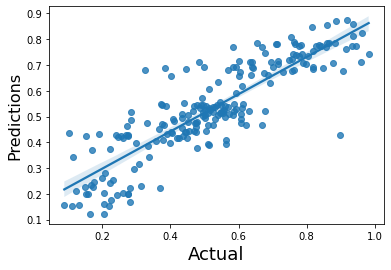

In [426]:
sns.regplot(x=y_test,y=y_test_pred)          # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [427]:
#evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7443941679800083

Observation : Our model has predicted an R^2 value of 79 and the test set has predicted the value of 74 and the above graph also shows that the model explains the changes in demand.

**Conclusion**

We initially considered all the variables and eliminated one by one by OLS method with the following rules :

1.   High p-value and high VIF - remove the variable
2.   High p-value and low VIF - remove next
3.   Low p-value and high VIF - remove after the 1st 2 steps
4.   Low p-value and low VIF - Keep the variables


After following the above steps of elimination our model gave us an R-Square value of 79 percent.

**Variables Significance**

cnt = 0.5128 + (0.2456)yr + (0.0630)workingday + (-0.1116)windspeed +(-0.2866)spring+(-0.0966)winter+(0.1130)Oct+(0.0812)Sep+(0.0670)Saturday+(-0.3205)Light Rain/Thunderstorm+(-0.0806)Misty
considering variables 'temp','hum','windspeed' and 'cnt' are normalized using min-max scaler b/w the values 0-1.


The test set has retured a value of 74% which is near to the predicted 79%.